In [1]:
 ! pip install -q kaggle


In [2]:
 from google.colab import files


In [ ]:
files.upload()


In [ ]:
 ! mkdir ~/.kaggle


In [5]:
! cp kaggle.json ~/.kaggle/


In [6]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

In [ ]:
! unzip /content/emotion-detection-fer.zip

In [9]:
import numpy as np
import pandas as   pd 
import os
import glob as gb  
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical    

In [10]:
train_data='/content/train/'
test_data='/content/test/'

In [11]:
def count_images(path):
  
    classes = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

    print(f"Number of classes : {len(classes)}")

    for folder in classes :
        folder_path = os.path.join(path, folder)
        image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]
        print(f"class: {folder} has {len(image_files)} images")


In [12]:
count_images("/content/train")

Number of classes : 7
class: sad has 4830 images
class: angry has 3995 images
class: happy has 7215 images
class: neutral has 4965 images
class: surprised has 3171 images
class: disgusted has 436 images
class: fearful has 4097 images


In [13]:
count_images("/content/test")

Number of classes : 7
class: sad has 1247 images
class: angry has 958 images
class: happy has 1774 images
class: neutral has 1233 images
class: surprised has 831 images
class: disgusted has 111 images
class: fearful has 1024 images


In [14]:
size = []
for  folder in os.listdir(train_data):
    files =  gb.glob(pathname=str(train_data +folder+'//*.png'))
    for file in files:
        img = cv2.imread(file)
        size.append(img.shape)

        
pd.Series(size).value_counts()

(48, 48, 3)    28709
dtype: int64

In [15]:
size = []
for  folder in os.listdir(test_data):
    files =  gb.glob(pathname=str(test_data +folder+'//*.png'))
    for file in files:
        img = cv2.imread(file)
        size.append(img.shape)

        
pd.Series(size).value_counts()
     

(48, 48, 3)    7178
dtype: int64

In [16]:
X_train = []
y_train = []
for  folder in os.listdir(train_data):
    files =  gb.glob(pathname=str(train_data +folder+'//*.png'))
    for file in files:
        img = cv2.imread(file)
        X_train.append(list(img))
        y_train.append(folder)

In [17]:
print(f"number of items in X_train: {len(X_train)}")

number of items in X_train: 28709


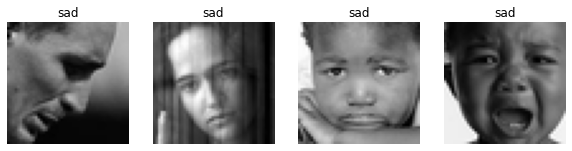

In [18]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [19]:
X_test = []
y_test = []
for  folder in os.listdir(test_data):
    files =  gb.glob(pathname=str(test_data +folder+'//*.png'))
    for file in files:
        img = cv2.imread(file)
        X_test.append(list(img))
        y_test.append(folder)

In [20]:
print(f"number of items in X_test: {len(X_test)}")

number of items in X_test: 7178


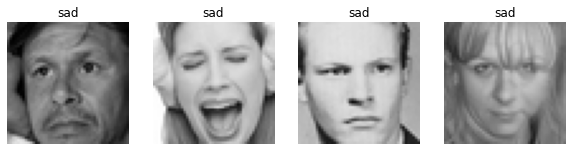

In [21]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(y_test[i])
    plt.axis('off')
plt.show()

In [22]:
x_train = np.array(X_train) /255.0
x_test = np.array(X_test)/255.0

print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')

X_train shape  is (28709, 48, 48, 3)
X_test shape  is (7178, 48, 48, 3)


In [23]:
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

y_train shape  is (28709,)
y_test shape  is (7178,)


In [24]:
le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train))
y_test = to_categorical(le.fit_transform(y_test))

In [25]:
y_train.shape


(28709, 7)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
model =model.fit(x_train, y_train,batch_size=128, epochs=100,verbose=1,validation_data=(x_test,y_test),callbacks=[tensorboard_callback])

Epoch 1/100
225/225 [==============================] - 8s 16ms/step - loss: 1.7142 - accuracy: 0.3159 - val_loss: 1.5462 - val_accuracy: 0.3944
Epoch 2/100
225/225 [==============================] - 3s 12ms/step - loss: 1.5169 - accuracy: 0.4143 - val_loss: 1.4278 - val_accuracy: 0.4590
Epoch 3/100
225/225 [==============================] - 3s 13ms/step - loss: 1.4382 - accuracy: 0.4498 - val_loss: 1.3691 - val_accuracy: 0.4781
Epoch 4/100
225/225 [==============================] - 2s 11ms/step - loss: 1.3750 - accuracy: 0.4765 - val_loss: 1.3315 - val_accuracy: 0.4919
Epoch 5/100
225/225 [==============================] - 2s 11ms/step - loss: 1.3286 - accuracy: 0.4908 - val_loss: 1.2921 - val_accuracy: 0.5020
Epoch 6/100
225/225 [==============================] - 2s 11ms/step - loss: 1.2784 - accuracy: 0.5099 - val_loss: 1.2651 - val_accuracy: 0.5117
Epoch 7/100
225/225 [==============================] - 2s 11ms/step - loss: 1.2352 - accuracy: 0.5320 - val_loss: 1.2507 - val_accuracy:

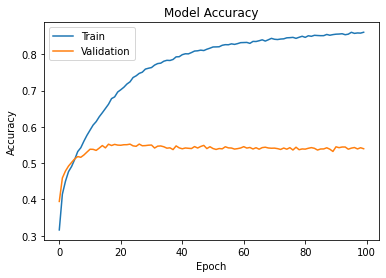

In [31]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

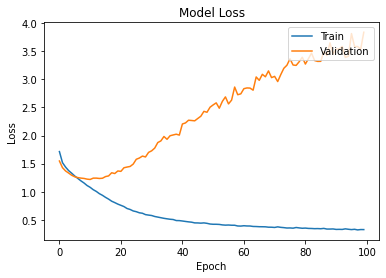

In [32]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()